# File Path

In [2]:
file_path_geo = r"C:\Users\Harsh mishra\Desktop\solarFarm\data\Geojson\solar_farms_india_2021_merged_simplified.geojson"

# Import Libraries

In [3]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json

# Code

In [5]:
# Import libraries
import geopandas as gpd

# Read the GeoJSON file
gdf = gpd.read_file(file_path_geo)

# Display the GeoDataFrame
print(gdf.head())


       State          Area   Latitude  Longitude  fid  \
0  Karnataka  3.072701e+05  13.094437  78.284459  677   
1  Karnataka  1.394675e+05  13.083870  78.292082  678   
2  Karnataka  5.497562e+05  13.121554  78.343837  675   
3  Karnataka  5.240948e+05  13.747866  77.552639  676   
4  Karnataka  1.701728e+06  13.551716  77.514227  665   

                                            geometry  
0  MULTIPOLYGON (((78.28741 13.09153, 78.28810 13...  
1  MULTIPOLYGON (((78.29433 13.07967, 78.29461 13...  
2  MULTIPOLYGON (((78.34330 13.12249, 78.34427 13...  
3  MULTIPOLYGON (((77.55266 13.74717, 77.55364 13...  
4  MULTIPOLYGON (((77.50913 13.55098, 77.51162 13...  


C:\temp\ipykernel_22888\2839970815.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf['geometry'].centroid


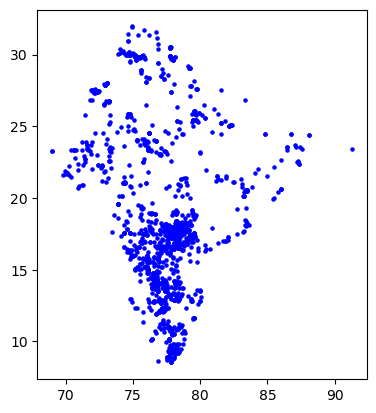

In [6]:
# Compute centroids
gdf['centroid'] = gdf['geometry'].centroid

# Plot centroids
gdf['centroid'].plot(marker='o', color='blue', markersize=5)
plt.show()

Getting statewise area and number of solar farms

In [7]:
# Read the local file
with open(file_path_geo, 'r') as file:
    d = json.load(file)

features = []
for item in d["features"]:
    features.append(item["properties"]) # only get the properties for each Feature object

df = pd.DataFrame(features, columns=["State", "Area", "Latitude", "Longitude", "fid"])
states = df["State"].drop_duplicates().sort_values(ascending=True).to_list() # get a sorted state list removing duplicate values

total_solar_areas_per_state = []
total_solar_count_per_state = []

for state in states:
    total_solar_areas_per_state.append(round((df[(df["State"] == state)]["Area"].sum()) / 1000000)) # sum the areas (m2) per state and divide by 1000000 to convert from m2 to km2
    total_solar_count_per_state.append((df["State"] == state).sum()) # sum the number of solar farms per state

# Print values as a reference
print(states)
print(total_solar_areas_per_state)
print(total_solar_count_per_state)


['Andhra Pradesh', 'Chhattisgarh', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Odisha', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
[59, 4, 35, 3, 1, 2, 295, 4, 54, 51, 9, 8, 145, 289, 192, 0, 6, 27, 4]
[69, 8, 73, 22, 6, 6, 343, 12, 59, 105, 27, 47, 88, 156, 250, 1, 21, 56, 14]


Plotting this information

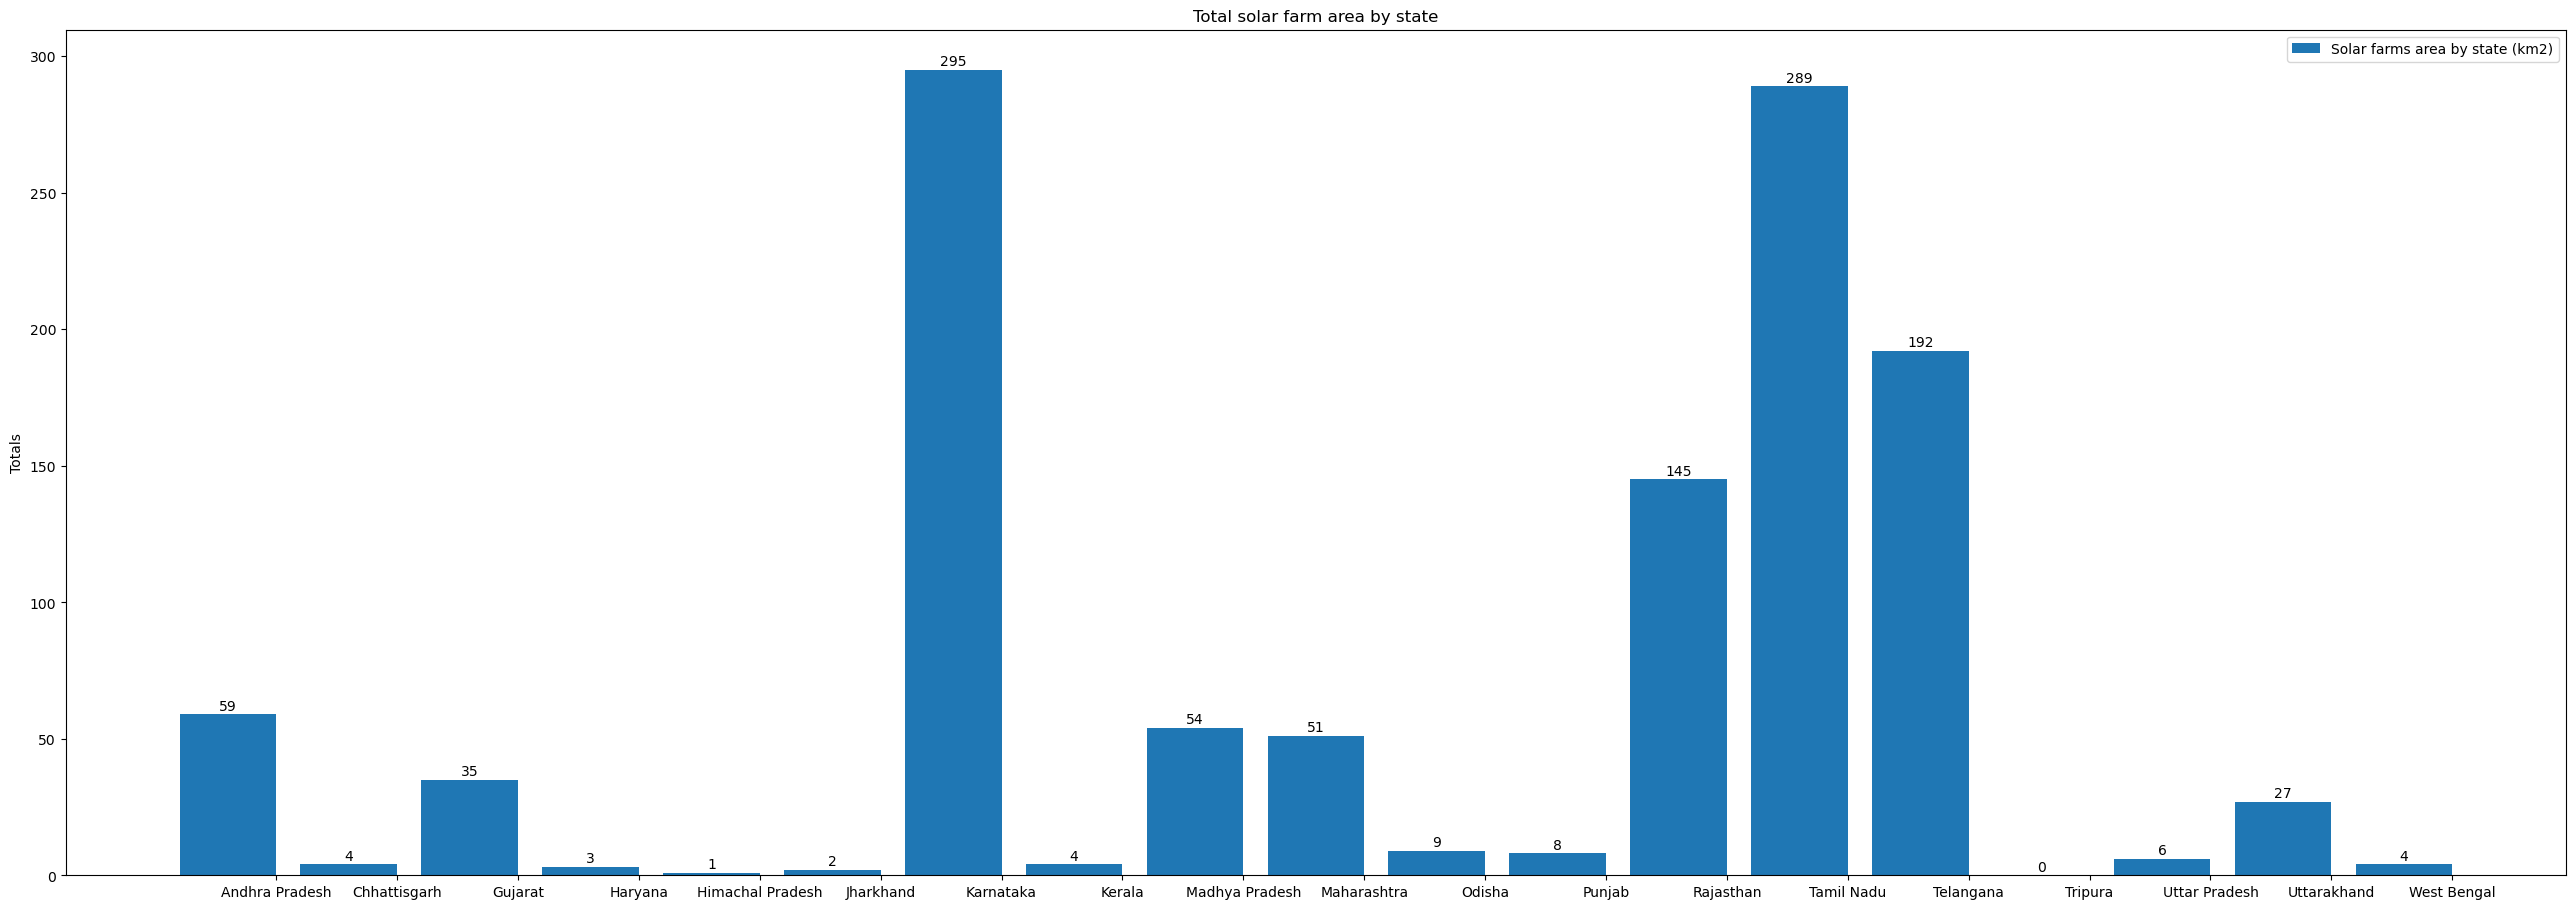

In [8]:
x = np.arange(len(states))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, total_solar_areas_per_state, width, label='Solar farms area by state (km2)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Totals')
ax.set_title('Total solar farm area by state')
ax.set_xticks(x, states)
ax.legend()

ax.bar_label(rects1, padding=1)

fig.tight_layout()
fig.set_size_inches(30, 10)

plt.show()

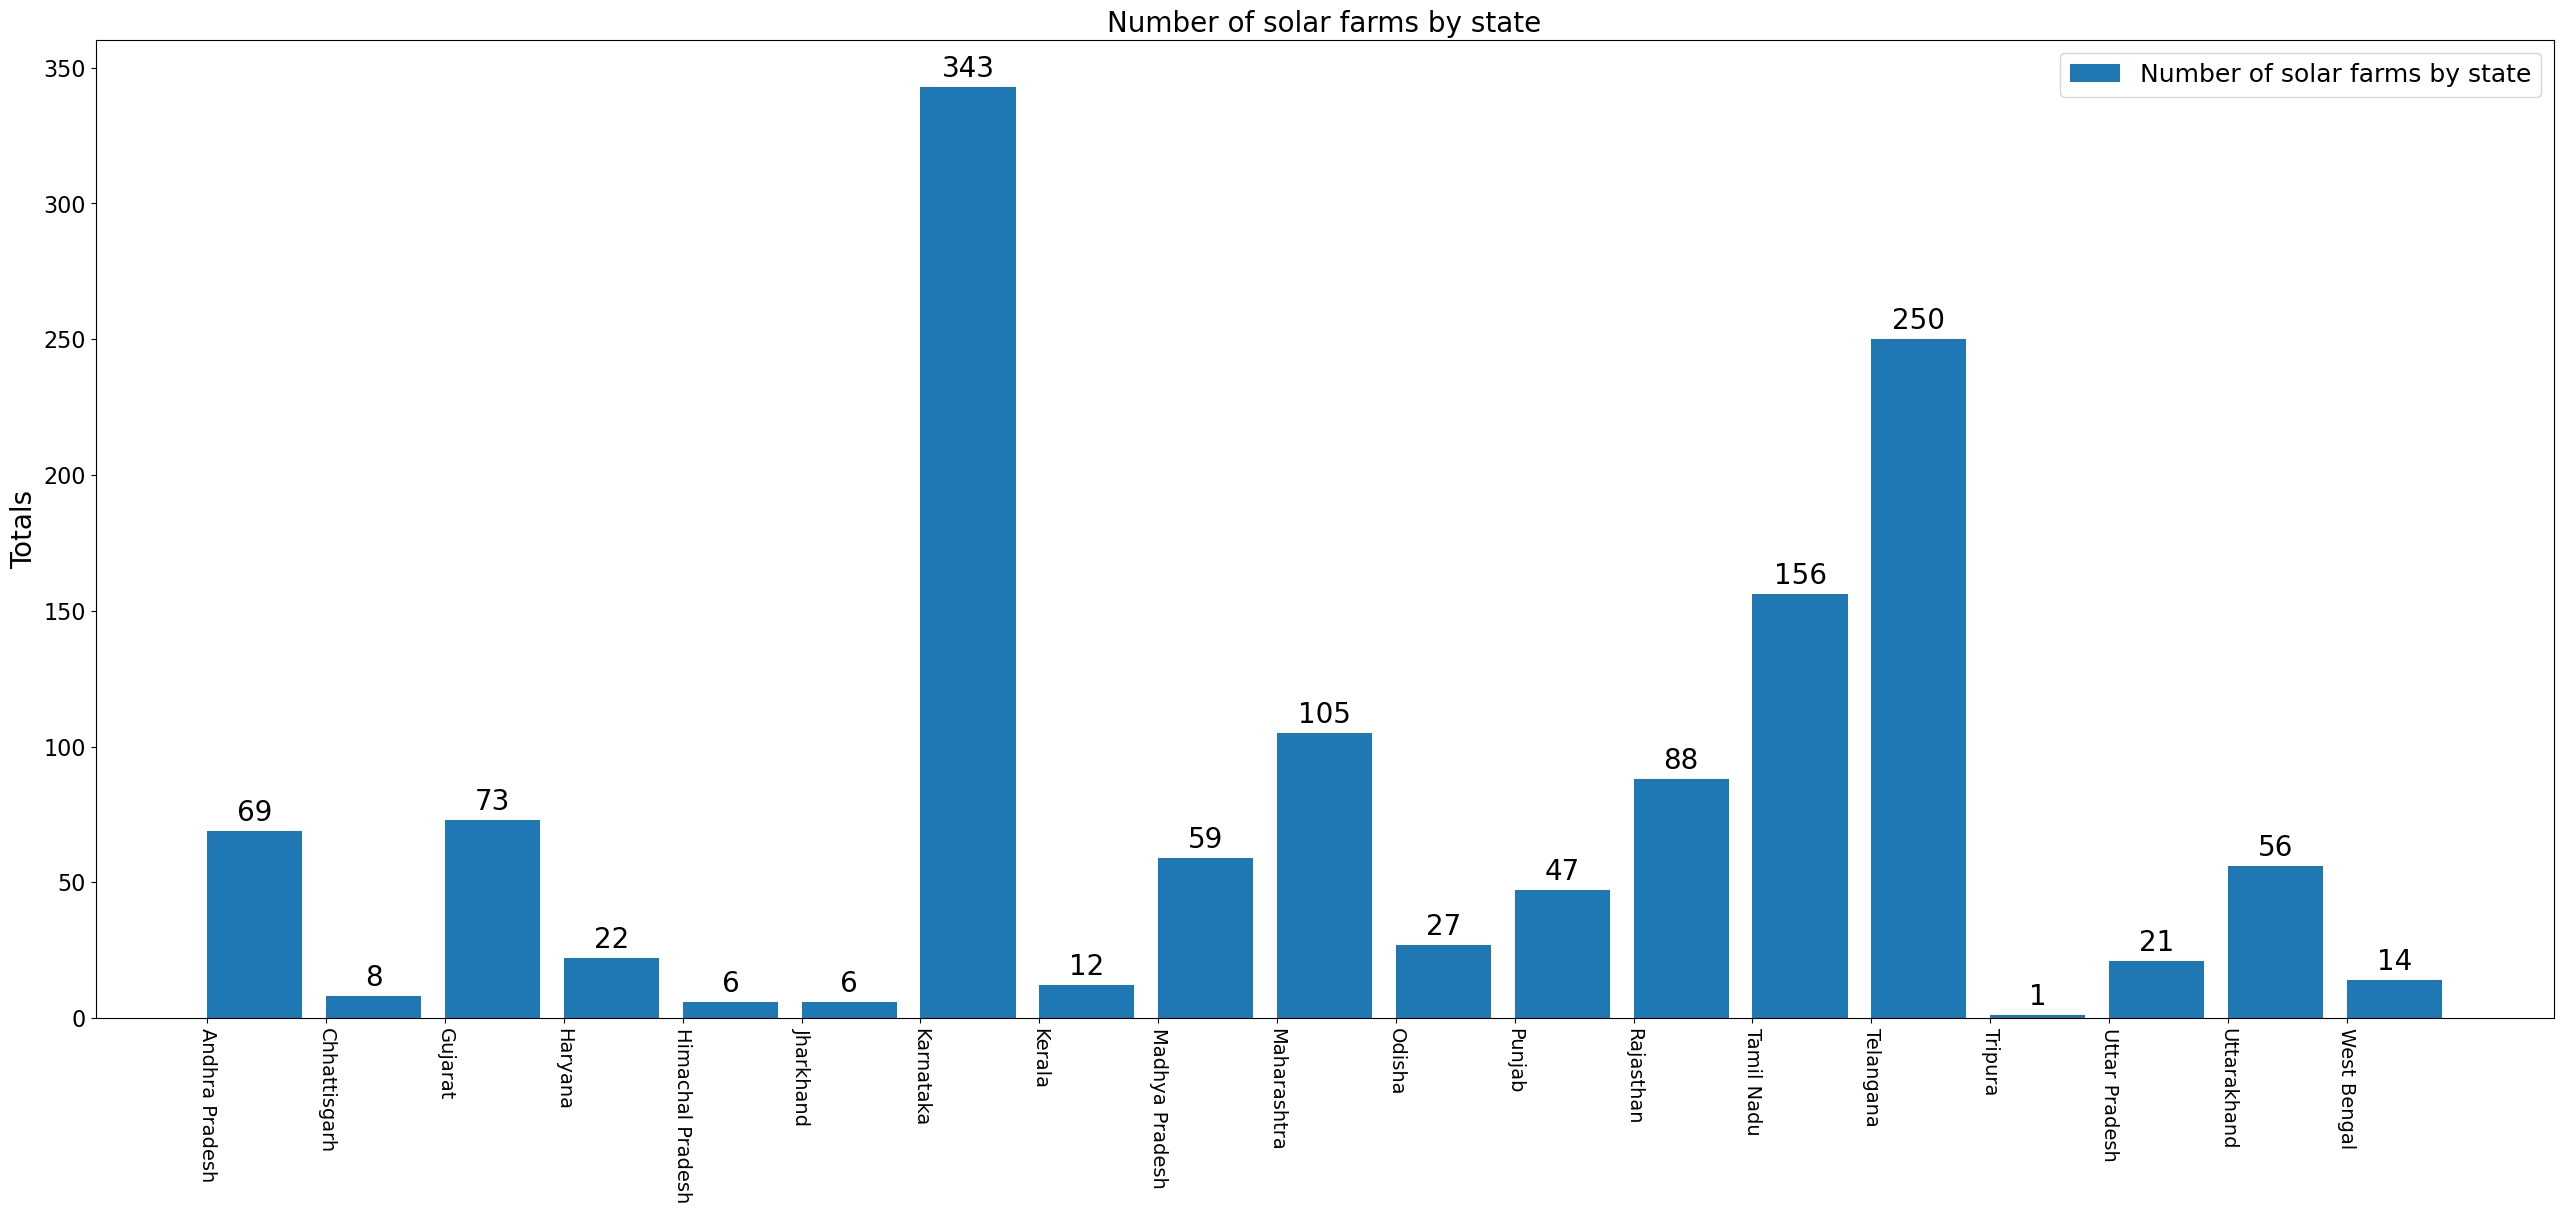

In [27]:
x = np.arange(len(states))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + width/2, total_solar_count_per_state, width, label='Number of solar farms by state')


ax.set_ylabel('Totals', fontsize = 20)
ax.set_title('Number of solar farms by state', fontsize = 20)
ax.set_xticks(x)
ax.set_xticklabels(states, rotation=-90, fontsize=14)  # Increase the fontsize as needed
ax.legend(fontsize = 18)

ax.bar_label(rects1, padding=3, fontsize=20)  # Increase the fontsize as needed
ax.tick_params(axis='y', labelsize=16)
fig.tight_layout()

fig.set_size_inches(30, 20)

plt.show()

Exporting this data to csv file

In [10]:
# Create a Pandas DataFrame
data = {'State': states, 'Total Solar Area (km2)': total_solar_areas_per_state, 'Total Solar Farm Count': total_solar_count_per_state}
df = pd.DataFrame(data)

output_path = r'C:\Users\Harsh mishra\Desktop\solarFarm\data\solar_farms_india_2021.csv'
df.to_csv(output_path, index = False)